In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## $\frac{dy(t)}{dt} = -k \; y(t)$


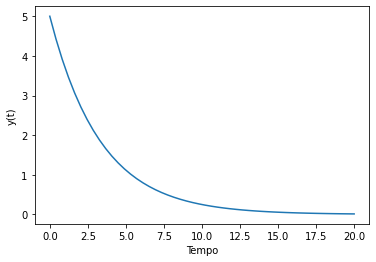

In [8]:
# Função que retorna dy/dt
def modelo(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

# Condição Inicial
y0 = 5

# Tempo
t = np.linspace(0,20)

# Resolvendo a EDO
y = odeint(modelo,y0,t)

# Plots
plt.plot(t,y)
plt.xlabel('Tempo')
plt.ylabel('y(t)')
plt.show()

## Variando os parâmetros de entrada K

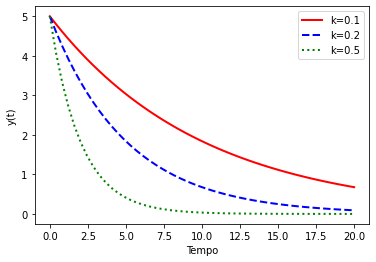

In [9]:
# Função que retorna dy/dt
def modelo(y,t,k):
    dydt = -k * y
    return dydt

# Condição Inicial
y0 = 5

# Tempo
t = np.linspace(0,20)

# Resolvendo a EDO
k = 0.1
y1 = odeint(modelo,y0,t,args=(k,))
k = 0.2
y2 = odeint(modelo,y0,t,args=(k,))
k = 0.5
y3 = odeint(modelo,y0,t,args=(k,))

# Plots
plt.plot(t,y1,'r-', linewidth=2, label='k=0.1')
plt.plot(t,y2,'b--', linewidth=2, label='k=0.2')
plt.plot(t,y3,'g:', linewidth=2, label='k=0.5')
plt.xlabel('Tempo')
plt.ylabel('y(t)')
plt.legend()
plt.show()

## $\frac{dy(t)}{dt} = -y(t) + 1$

### $y(0) = 0$

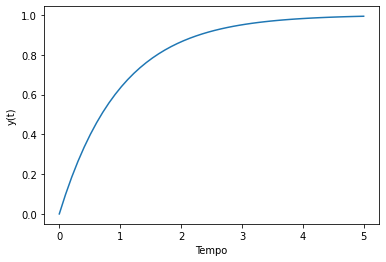

In [10]:
# Função que retorna dy/dt
def modelo(y,t):
    dydt = -y + 1.0
    return dydt

# Condição Inicial
y0 = 0

# Tempo
t = np.linspace(0,5)

# Resolvendo a EDO
y = odeint(modelo,y0,t)

# Plots
plt.plot(t,y)
plt.xlabel('Tempo')
plt.ylabel('y(t)')
plt.show()

## $5 \; \frac{dy(t)}{dt} = -y(t) + u(t)$

### $y(0) = 1$

$u$ Função Degrau de $0$ a $2$ com $t=10$

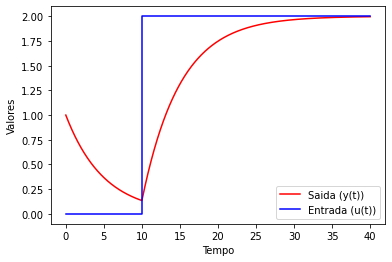

In [12]:
# Função que retorna dy/dt
def model(y,t):
    # u degrau de 0 a 2 com t=10
    if t<10.0:
        u = 0
    else:
        u = 2
    dydt = (-y + u)/5.0
    return dydt

# Condição Inicial
y0 = 1

# Tempo
t = np.linspace(0,40,1000)

# Resolvendo a EDO
y = odeint(model,y0,t)

# Plots
plt.plot(t,y,'r-',label='Saida (y(t))')
plt.plot([0,10,10,40],[0,0,2,2],'b-',label='Entrada (u(t))')
plt.ylabel('Valores')
plt.xlabel('Tempo')
plt.legend(loc='best')
plt.show()

## $\frac{dx(t)}{dt} = 3 \; exp(-t)$

## $\frac{dy(t)}{dt} = 3 - y(t)$

$x(0) = 0$

$y(0) = 0$

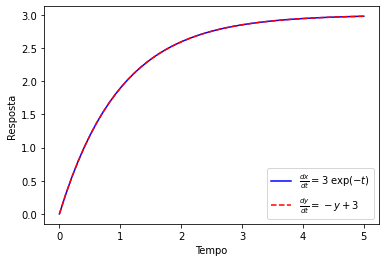

In [20]:
# Função que retorna dz/dt
def modelo(z,t):
    dxdt = 3.0 * np.exp(-t)
    dydt = -z[1] + 3
    dzdt = [dxdt,dydt]
    return dzdt

# Condição Inicial
z0 = [0,0]

# Tempo
t = np.linspace(0,5)

# Resolvendo a EDO
z = odeint(modelo,z0,t)

# Plots
plt.plot(t,z[:,0],'b-',label=r'$\frac{dx}{dt}=3 \; \exp(-t)$')
plt.plot(t,z[:,1],'r--',label=r'$\frac{dy}{dt}=-y+3$')
plt.ylabel('Resposta')
plt.xlabel('Tempo')
plt.legend(loc='best')
plt.show()

## $2 \; \frac{dx(t)}{dt} = -x(t) + u(t)$

## $5 \; \frac{dy(t)}{dt} = -y(t) + x(t)$

### $u = 2 \, S(t-5)$

$u$ é uma Função Degrau de $0$ a $1$ com $t=5$

$x(0) = 0$

$y(0) = 0$




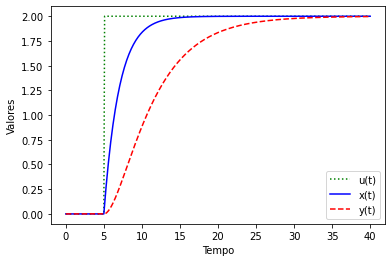

In [23]:
# Função que retorna dz/dt
def modelo(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

# Condição Inicial
z0 = [0,0]

# Numeros de Pontos
n = 401

# Tempo
t = np.linspace(0,40,n)

# Degrau de Entrada
u = np.zeros(n)
# Multiplicando por 2.0 com tempo = 5.0
u[51:] = 2.0

# Solução
x = np.empty_like(t)
y = np.empty_like(t)
# Registrando Condições Iniciais
x[0] = z0[0]
y[0] = z0[1]

# Resolvendo a EDO
for i in range(1,n):
    # Intervalo para o próximo passo de tempo
    tspan = [t[i-1],t[i]]
    # Resolvendo o proximo passo
    z = odeint(modelo,z0,tspan,args=(u[i],))
    # Solução armazenada
    x[i] = z[1][0]
    y[i] = z[1][1]
    # Proxima Condição Inicial
    z0 = z[1] 

# Plots
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('Valores')
plt.xlabel('Tempo')
plt.legend(loc='best')
plt.show()